# Classic PCA Analysis on MNIST Dataset

- Download the MNIST data set

- Try to visualize this dataset using PCA and KernelPCA

- Examine explained variance. Draw explained variance vs number of principal Components plot.

- Find number of principal components for 99%, 95%, 90%, and 85% of explained variance.

- Draw some sample MNIST digits and from PCA of its images transform data back to its original space . Make an inverse transformation for the number of components corresponding with explained variance shown above and draw the reconstructed images.

- Perform the same reconstruction  using KernelPCA (make comparisons for the same components number).


In [1]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.kernel_ridge import KernelRidge

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
mnist = fetch_openml("mnist_784")

In [3]:
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


I needed to limit the size of the dataset to just 1000 examples of images to speed up the time of calculations

In [9]:
pca = PCA(2)
kpca = KernelPCA(2, kernel='cosine')
np.random.seed(1)
indexes = np.random.randint(70000, size=1000)
y = mnist.target[indexes]

X = mnist.data.iloc[indexes, :]
X_pca = pca.fit_transform(X)
X_kpca = kpca.fit_transform(X)

### Dimensionality reduction

We can see how differently PCA and KernelPCA transform the dataset

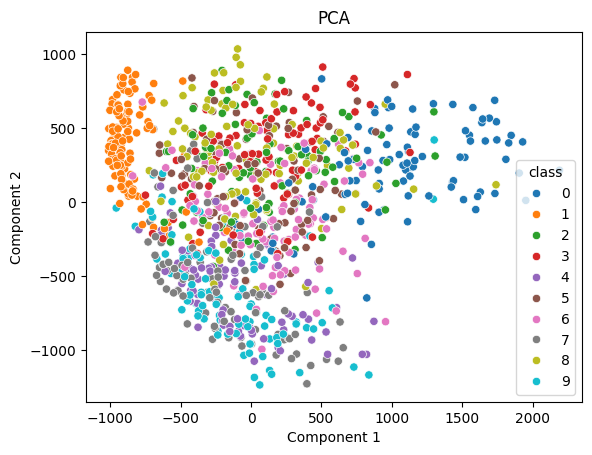

In [5]:
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y)
plt.title("PCA")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

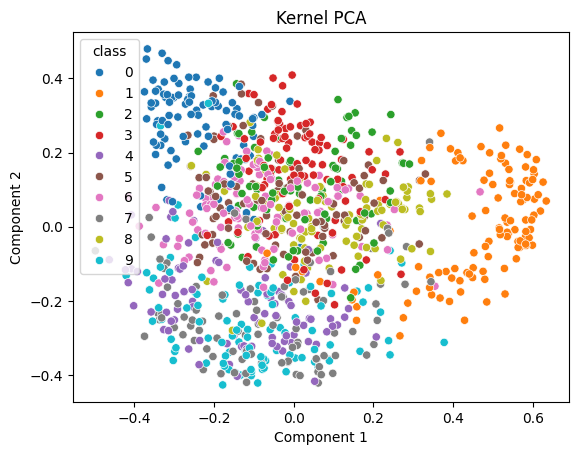

In [10]:
sns.scatterplot(x=X_kpca[:, 0], y=X_kpca[:, 1], hue=y)
plt.title("Kernel PCA")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

### Explained variance

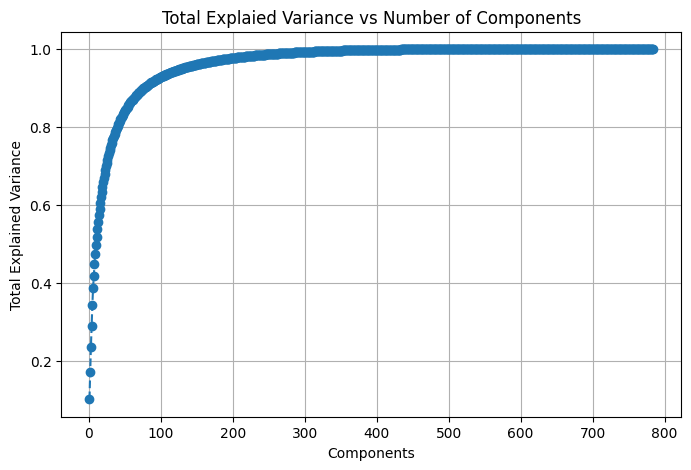

In [7]:
pca = PCA()
X_pca = pca.fit_transform(mnist.data.iloc[indexes, :])

explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(
    range(1, len(explained_variance) + 1),
    explained_variance,
    marker="o",
    linestyle="--",
)
plt.title("Total Explaied Variance vs Number of Components")
plt.xlabel("Components")
plt.ylabel("Total Explained Variance")
plt.grid()

plt.show()

Although we reduced the dimensionalities, we still need quite a lot of them to be able to recreate the original pattern if the data. <br>
The graph shows, that we will need around 100 components to explain ~90% of variance and around 250 components to explain ~99% of the variance.

In [8]:
thresholds = [0.99, 0.95, 0.90, 0.85]
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components required for each threshold
components_required = {t: np.argmax(cumulative_variance >= t) + 1 for t in thresholds}

# Print results
for threshold, num_components in components_required.items():
    print(
        f"Number of components needed to retain {threshold * 100:.0f}% variance: {num_components}"
    )

Number of components needed to retain 99% variance: 272
Number of components needed to retain 95% variance: 129
Number of components needed to retain 90% variance: 77
Number of components needed to retain 85% variance: 54


### Reconstructing original images using PCA and KernelPCA

In [16]:
def plot_pca_vs_kpca(X, n_components):
    # PCA
    pca = PCA(n_components)
    X_pca = pca.fit_transform(X)
    X_pca_reconstructed = pca.inverse_transform(X_pca)

    kpca = KernelPCA(n_components, fit_inverse_transform=True)
    X_kpca = kpca.fit_transform(X)
    X_kpca_reconstructed = kpca.inverse_transform(X_kpca)

    image_indices = [0, 1, 2, 3, 4, 5]

    fig, axs = plt.subplots(nrows=2, ncols=6, figsize=(15, 8))
    fig.suptitle(f"PCA vs KernelPCA Reconstruction | n_components = {n_components}", fontsize=14)

    for i, idx in enumerate(image_indices):
        axs[0, i].imshow(
            X_pca_reconstructed[idx].reshape(28, 28),
            cmap=plt.cm.gray_r,
            interpolation="nearest",
        )
        axs[0, i].set_title(f"PCA - Image {idx}")
        axs[0, i].axis("off")

    for i, idx in enumerate(image_indices):
        axs[1, i].imshow(
            (X_kpca_reconstructed[idx].reshape(28, 28)), cmap=plt.cm.gray_r, interpolation="nearest"
        )
        axs[1, i].set_title(f"Kernel PCA - Image {idx}")
        axs[1, i].axis("off")

    plt.tight_layout()
    plt.show()

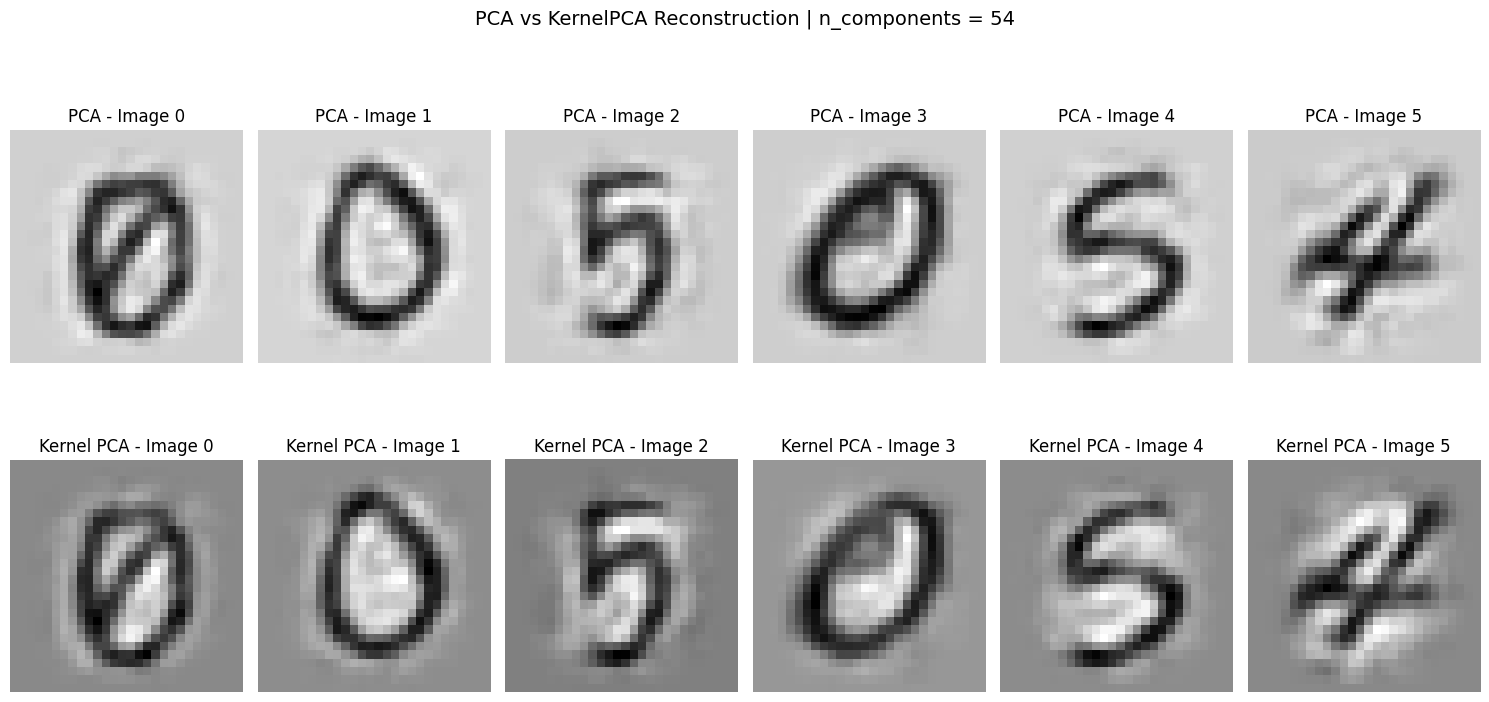

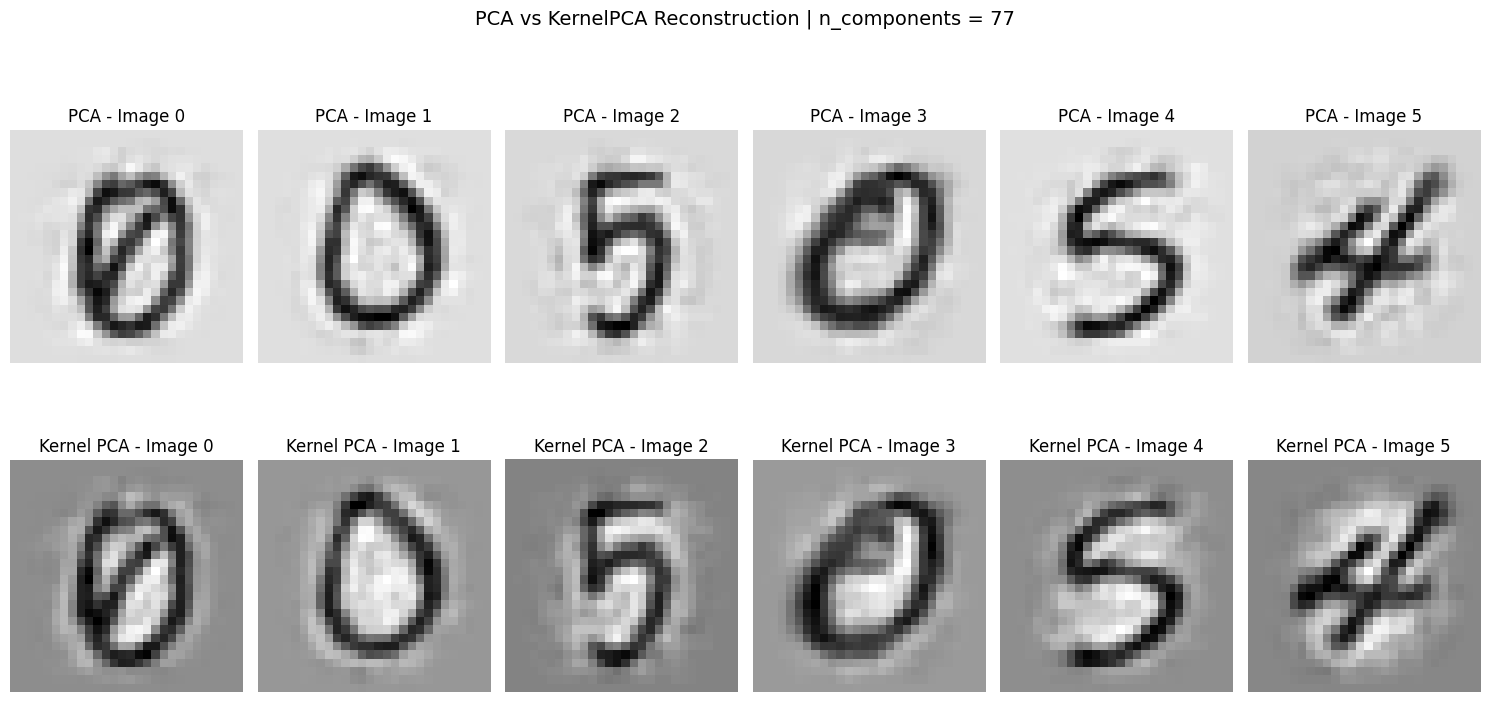

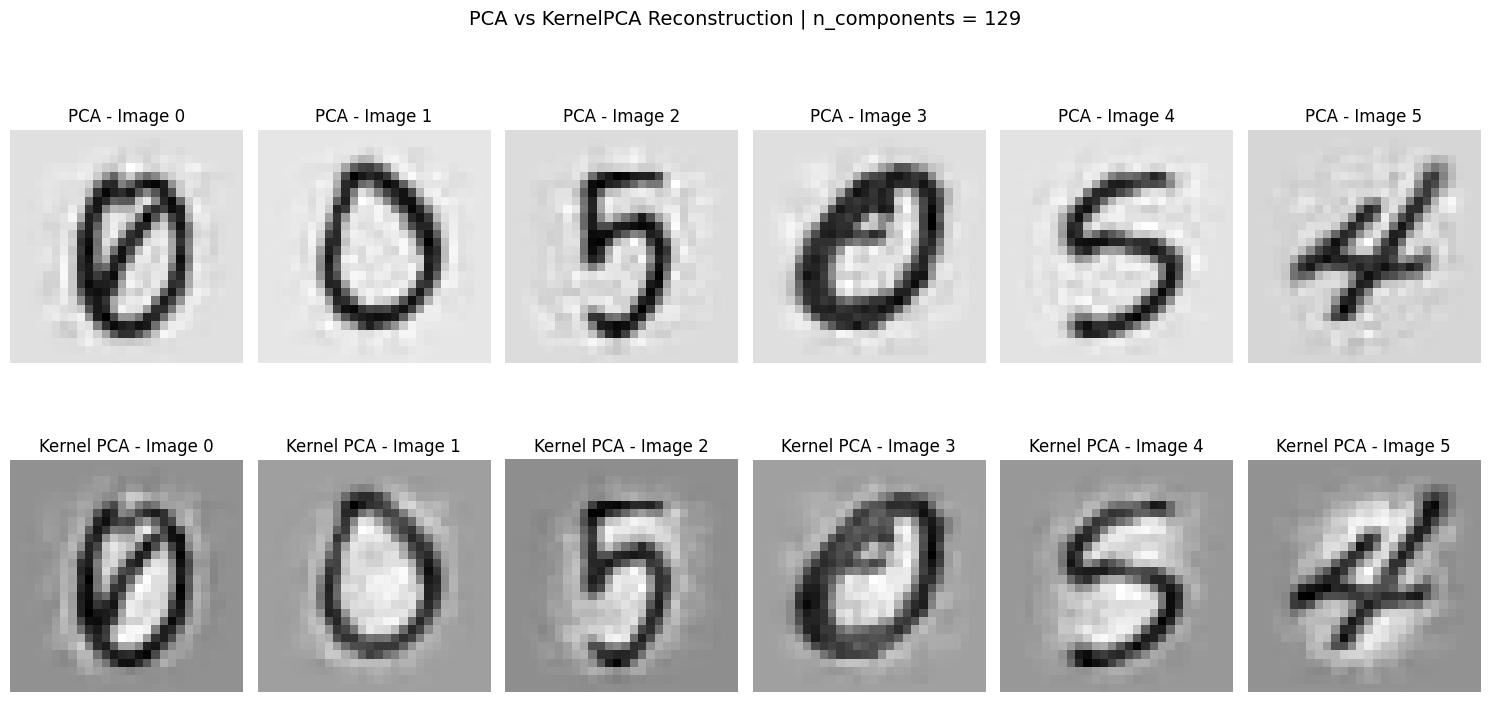

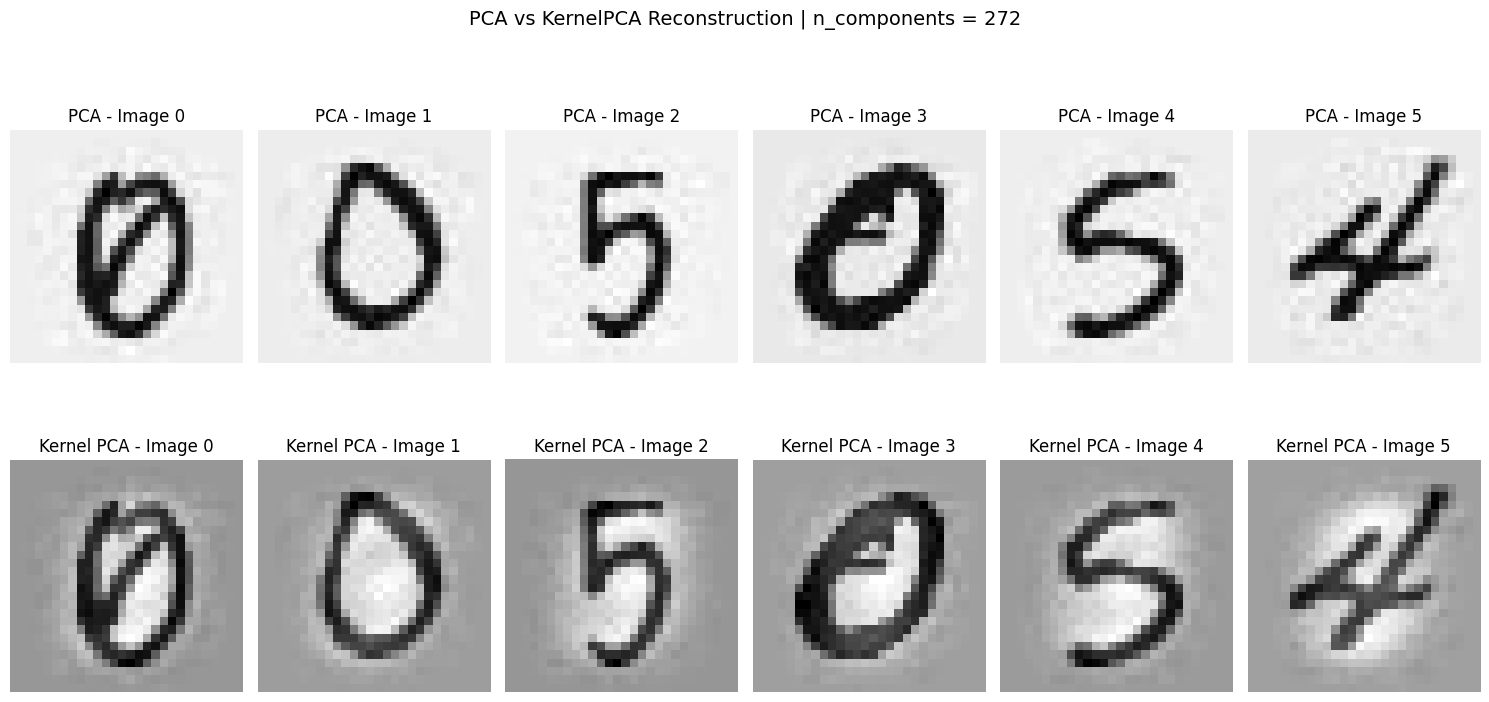

In [17]:
components = sorted(components_required.values())

for component in components:
    plot_pca_vs_kpca(X, component)

## Summary

### Strengths and limitations

#### Strengths
The key strenghts of using PCA, in my opinion, lays in the ability to reduce the number of features to just 2 or 3 components which allows us to visualize it in an efficient way, and what's most important, a way that is comprehensible for humans. <br>
With dimensional reduction there also comes the benefit of reducing the computational costs of training models on such data, because the datasets may become significantly minimized to just a few features.

#### Limitations
The key limitation is that with reducing the dimensions, we lose the explainability of models we train on the reduced datasets, because we can't tell exactly what was the impact of a particular feature on the resulting components

### Real-world scenario

There certainly are scenarios where PCA can be useful e.g.:
- PCA reduces image dimensionality while retaining essential information. It helps create compact representations of images, making them easier to store and transmit.
- PCA helps to visualize high-dimensional data by projecting it into a lower-dimensional space, such as a 2D or 3D plot. This simplifies data interpretation and exploration.
- PCA can remove noise or redundant information from data by focusing on the principal components that capture the underlying patterns.

### Computational complexity

PCA is computationally extensive. the Big-O notation for the complexity of calculating principal components analysis is 𝑂($p^2$ n + $p^3$) for a dataset of size 𝑛 with 𝑝 features.

### Improvements or limitations

There are several ways to improve how PCA works, depending on the goals— whether it's improving accuracy, interpretability, or efficiency

#### Normalization
PCA is sensitive to scale differences in features, so we can apply standarization to get better principal components. <br>
This prevents features with large variances from dominating the PCA.
#### Feature Selection
We can remove highly correlated features to reduce redundancy. <br>
There is an option to use variance threshold from sklearn.feature_selection to drop low-variance features.<br>
This helps PCA focus on important patterns.
#### Parameter Tuning
Instead of choosing a fixed number of components, we can use explained variance as a value for n_components. <br>
This dynamically selects the number of components needed.
#### Incremental PCA
If our dataset is large, we can use Incremental PCA to process it in batches as this reduces memory usage compared to standard PCA.
#### Sparse PCA
Sparse PCA forces many components to be zero, improving interpretability when dealing with sparse feaure matrices







